In [1216]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [1217]:
df=pd.read_csv("D:\Loan-Approval-Prediction.csv")

In [1218]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [1219]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [1220]:
df.shape

(614, 13)

In [1221]:
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [1222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [1223]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

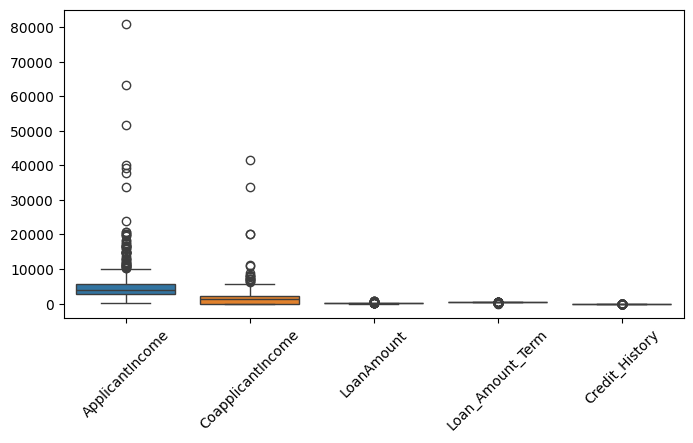

In [1224]:
# Detect Outliers
plt.figure(figsize=(8,4))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [1225]:
# Fill the null values
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [1226]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [1227]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [1228]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])


In [1229]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])


In [1230]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])


In [1231]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [1232]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Number of Male and Female person took Loan

Gender
Male      502
Female    112
Name: count, dtype: int64


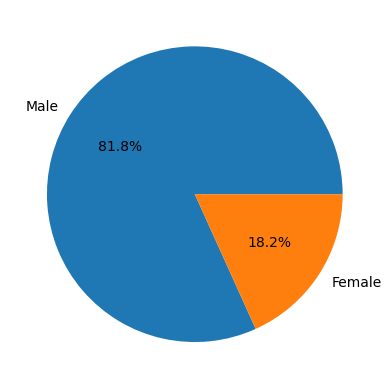

In [1233]:
print(df['Gender'].value_counts())
plt.pie(df['Gender'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%')
plt.show()

# Number people who took loan by Married

Married
Yes    401
No     213
Name: count, dtype: int64


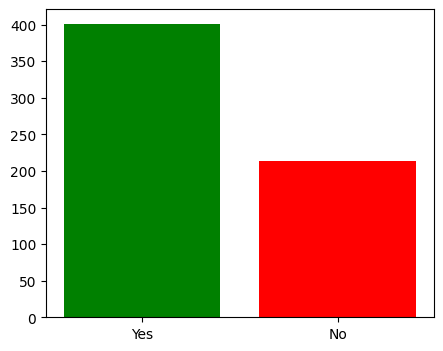

In [1234]:
plt.figure(figsize=(5,4))
print(df['Married'].value_counts())
plt.bar(df['Married'].value_counts().index,df['Married'].value_counts().values,color=['green','red'])
plt.show()

# Number of people took loan by education

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


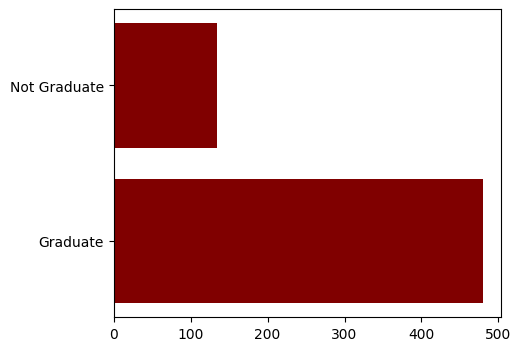

In [1235]:
plt.figure(figsize=(5,4))
print(df['Education'].value_counts())
plt.barh(df['Education'].value_counts().index,df['Education'].value_counts().values,color='maroon')
plt.show()

# Number of people took loan by Property Area

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


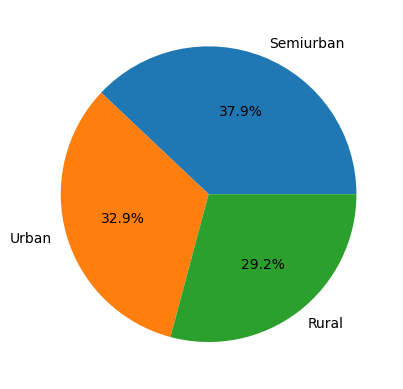

In [1236]:
print(df['Property_Area'].value_counts())
plt.pie(df['Property_Area'].value_counts(),labels=['Semiurban','Urban','Rural'],autopct='%1.1f%%')
plt.show()

# Number of people took loan by Dependents

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


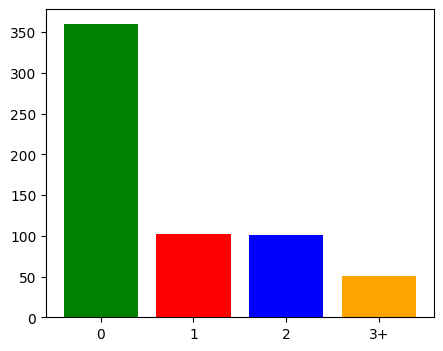

In [1237]:
plt.figure(figsize=(5,4))
print(df['Dependents'].value_counts())
plt.bar(df['Dependents'].value_counts().index,df['Dependents'].value_counts().values,color=['green','red','blue','orange'])
plt.show()

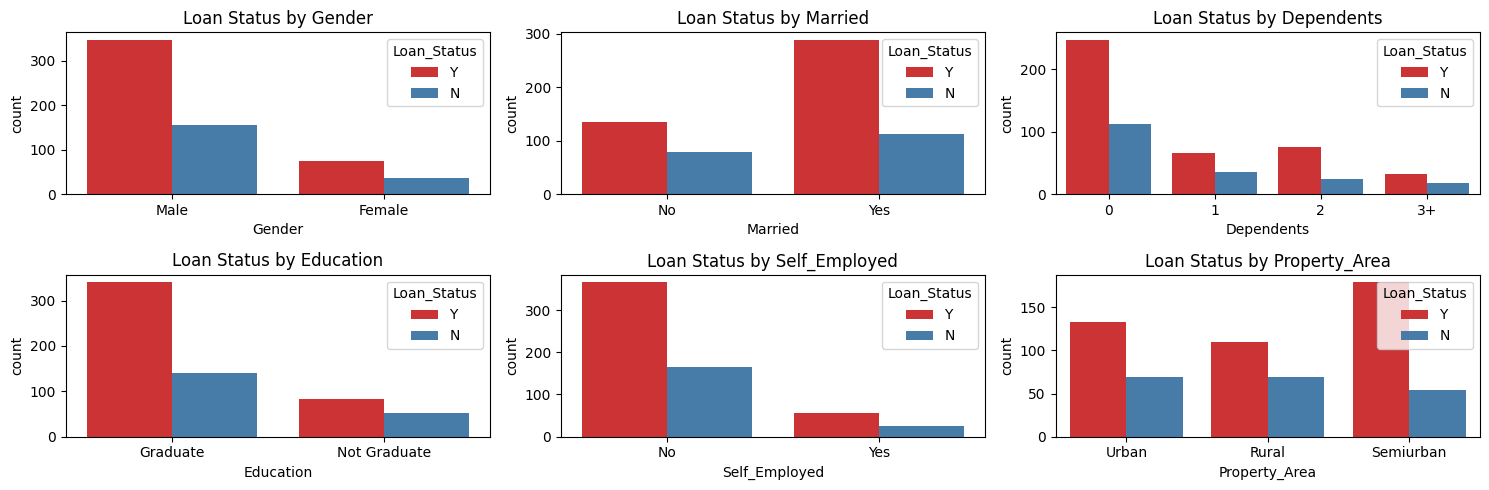

In [1238]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area']
fig, axes = plt.subplots(2, 3, figsize=(15, 5))
axes = axes.ravel()
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='Loan_Status', data=df, palette='Set1', ax=axes[i])
    axes[i].set_title(f"Loan Status by {col}")

# Adjust layout
plt.tight_layout()
plt.show()


# Loan Status

In [1239]:
print(df['Loan_Status'].value_counts())

Loan_Status
Y    422
N    192
Name: count, dtype: int64


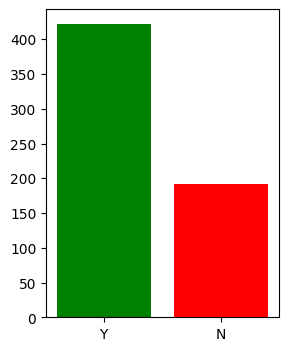

In [1240]:
plt.figure(figsize=(3,4))
plt.bar(df['Loan_Status'].value_counts().index,df['Loan_Status'].value_counts().values,color=['Green','Red'])
plt.show()

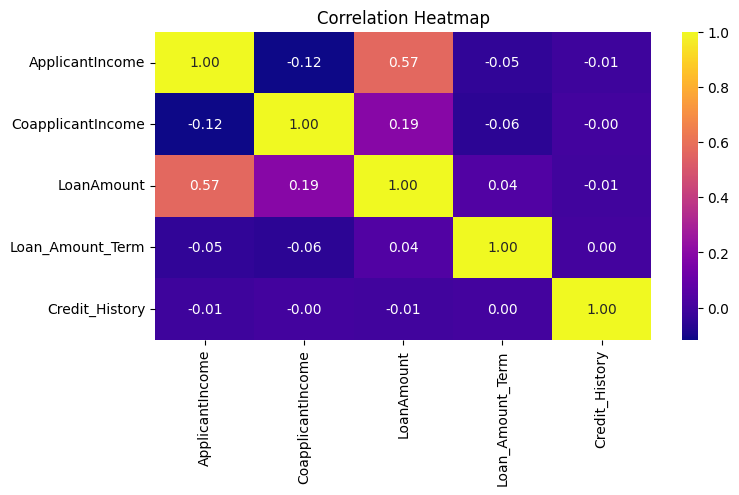

In [1241]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="plasma", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
# Here LoanAmount and ApplicationIncome both are positivly correlated

In [1242]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.000000,0.842199
std,6109.041673,2926.248369,84.107233,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [1243]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


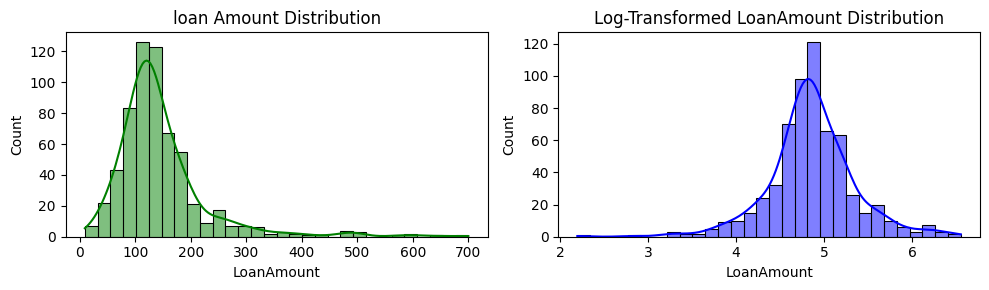

In [1244]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Original distribution
sns.histplot(df['LoanAmount'], kde=True, bins=30, color='green', ax=axes[0])
axes[0].set_title("loan Amount Distribution")

# Log-transformed distribution
sns.histplot(np.log(df['LoanAmount']), kde=True, bins=30, color='blue', ax=axes[1])
axes[1].set_title("Log-Transformed LoanAmount Distribution")

plt.tight_layout()
plt.show()


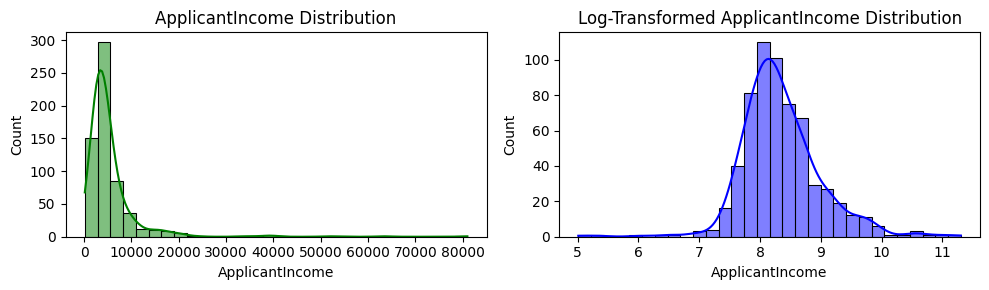

In [1245]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Original distribution
sns.histplot(df['ApplicantIncome'], kde=True, bins=30, color='green', ax=axes[0])
axes[0].set_title("ApplicantIncome Distribution")

# Log-transformed distribution
sns.histplot(np.log(df['ApplicantIncome']), kde=True, bins=30, color='blue', ax=axes[1])
axes[1].set_title("Log-Transformed ApplicantIncome Distribution")

plt.tight_layout()
plt.show()

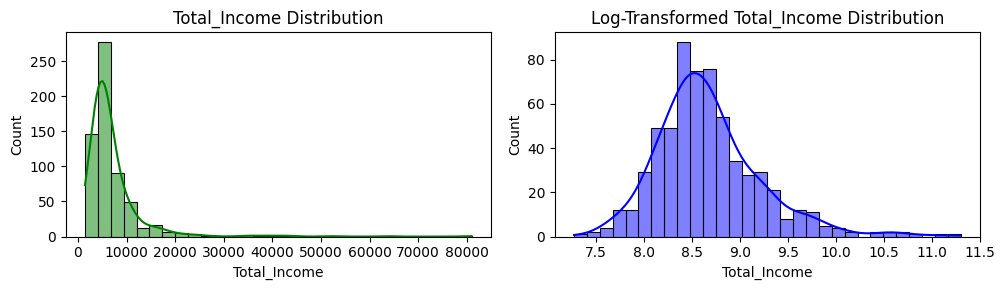

In [1246]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Original distribution
sns.histplot(df['Total_Income'], kde=True, bins=30, color='green', ax=axes[0])
axes[0].set_title("Total_Income Distribution")

# Log-transformed distribution
sns.histplot(np.log(df['Total_Income']), kde=True, bins=30, color='blue', ax=axes[1])
axes[1].set_title("Log-Transformed Total_Income Distribution")

plt.tight_layout()
plt.show()

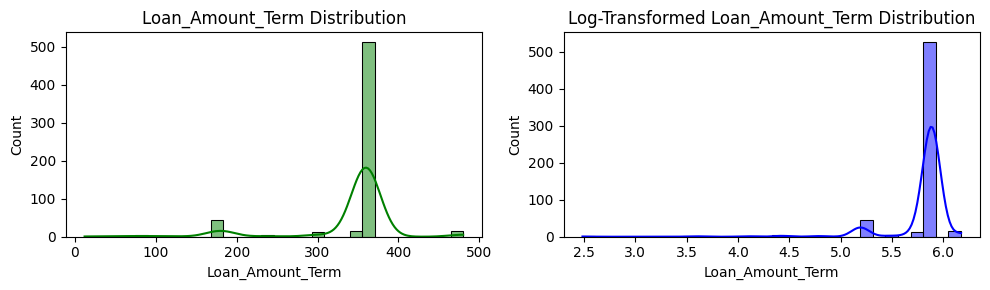

In [1247]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Original distribution
sns.histplot(df['Loan_Amount_Term'], kde=True, bins=30, color='green', ax=axes[0])
axes[0].set_title("Loan_Amount_Term Distribution")

# Log-transformed distribution
sns.histplot(np.log(df['Loan_Amount_Term']), kde=True, bins=30, color='blue', ax=axes[1])
axes[1].set_title("Log-Transformed Loan_Amount_Term Distribution")

plt.tight_layout()
plt.show()


In [1248]:
df_log = df.copy()

# Apply log transformation to skewed numeric columns
cols_to_log = ['ApplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income'] 
for col in cols_to_log:
    df_log[col] = np.log(df_log[col] + 1)  # +1 to avoid log(0)


In [1249]:
df_log.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,8.674197,0.0,4.859812,5.888878,1.0,Urban,Y,8.674197
1,LP001003,Male,Yes,1,Graduate,No,8.430327,1508.0,4.859812,5.888878,1.0,Rural,N,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,8.006701,0.0,4.204693,5.888878,1.0,Urban,Y,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,7.857094,2358.0,4.795791,5.888878,1.0,Urban,Y,8.505525
4,LP001008,Male,No,0,Graduate,No,8.699681,0.0,4.955827,5.888878,1.0,Urban,Y,8.699681


In [1250]:
cols=['Loan_ID','CoapplicantIncome']
df_log=df_log.drop(columns=cols,axis=1)
df_log.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,8.674197,4.859812,5.888878,1.0,Urban,Y,8.674197
1,Male,Yes,1,Graduate,No,8.430327,4.859812,5.888878,1.0,Rural,N,8.714732
2,Male,Yes,0,Graduate,Yes,8.006701,4.204693,5.888878,1.0,Urban,Y,8.006701
3,Male,Yes,0,Not Graduate,No,7.857094,4.795791,5.888878,1.0,Urban,Y,8.505525
4,Male,No,0,Graduate,No,8.699681,4.955827,5.888878,1.0,Urban,Y,8.699681


In [1251]:
from sklearn.preprocessing import LabelEncoder
label_cols = ['Gender', 'Married','Education', 'Self_Employed','Property_Area','Dependents', 'Loan_Status']
encoder = LabelEncoder()

for col in label_cols:
    df_log[col] = encoder.fit_transform(df_log[col])


In [1252]:
df_log.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,8.674197,4.859812,5.888878,1.0,2,1,8.674197
1,1,1,1,0,0,8.430327,4.859812,5.888878,1.0,0,0,8.714732
2,1,1,0,0,1,8.006701,4.204693,5.888878,1.0,2,1,8.006701
3,1,1,0,1,0,7.857094,4.795791,5.888878,1.0,2,1,8.505525
4,1,0,0,0,0,8.699681,4.955827,5.888878,1.0,2,1,8.699681


In [1253]:
# Split Independent and dependent features
x = df_log.drop(columns = ['Loan_Status'],axis=1)
y = df_log['Loan_Status']

In [1254]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1,0,0,0,0,8.674197,4.859812,5.888878,1.0,2,8.674197
1,1,1,1,0,0,8.430327,4.859812,5.888878,1.0,0,8.714732
2,1,1,0,0,1,8.006701,4.204693,5.888878,1.0,2,8.006701
3,1,1,0,1,0,7.857094,4.795791,5.888878,1.0,2,8.505525
4,1,0,0,0,0,8.699681,4.955827,5.888878,1.0,2,8.699681


In [1255]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [1256]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [1257]:
x_train

array([[ 0.48637346,  0.76564149,  1.2636708 , ...,  0.44770618,
         1.21879102, -0.26566258],
       [ 0.48637346, -1.30609431, -0.72024923, ...,  0.44770618,
        -1.33539518,  0.18100077],
       [ 0.48637346,  0.76564149,  2.25563082, ...,  0.44770618,
         1.21879102,  0.34267546],
       ...,
       [-2.05603325, -1.30609431, -0.72024923, ...,  0.44770618,
         1.21879102, -1.0954807 ],
       [-2.05603325,  0.76564149, -0.72024923, ...,  0.44770618,
        -0.05830208,  0.97842168],
       [ 0.48637346,  0.76564149, -0.72024923, ...,  0.44770618,
         1.21879102,  1.53963235]])

In [1258]:
x_test

array([[ 0.48637346,  0.76564149, -0.72024923, ...,  0.44770618,
        -0.05830208,  0.7937092 ],
       [ 0.48637346,  0.76564149, -0.72024923, ..., -0.00566997,
        -0.05830208, -0.5713102 ],
       [ 0.48637346,  0.76564149,  1.2636708 , ...,  0.44770618,
        -1.33539518, -0.08732477],
       ...,
       [-2.05603325,  0.76564149, -0.72024923, ...,  0.44770618,
        -0.05830208, -1.13608468],
       [ 0.48637346,  0.76564149,  1.2636708 , ..., -2.42537416,
        -0.05830208, -0.53347015],
       [ 0.48637346, -1.30609431, -0.72024923, ...,  0.44770618,
         1.21879102, -0.82614387]])

In [1259]:
x_train.shape,x_test.shape

((460, 11), (154, 11))

# XGBOOST

In [1260]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

Accuracy Score: 0.7857142857142857
Confusion Matrix:
 [[28 26]
 [ 7 93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.52      0.63        54
           1       0.78      0.93      0.85       100

    accuracy                           0.79       154
   macro avg       0.79      0.72      0.74       154
weighted avg       0.79      0.79      0.77       154



# DECISION TREE

In [1261]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

Accuracy Score: 0.7077922077922078
Confusion Matrix:
 [[27 27]
 [18 82]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.50      0.55        54
           1       0.75      0.82      0.78       100

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



# KNN

In [1262]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

Accuracy Score: 0.7337662337662337
Confusion Matrix:
 [[24 30]
 [11 89]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.44      0.54        54
           1       0.75      0.89      0.81       100

    accuracy                           0.73       154
   macro avg       0.72      0.67      0.68       154
weighted avg       0.73      0.73      0.72       154



# LOGISTICS

In [1263]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

Accuracy Score: 0.7727272727272727
Confusion Matrix:
 [[21 33]
 [ 2 98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



# SUPPORT VECTOR

In [1264]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

Accuracy Score: 0.7727272727272727
Confusion Matrix:
 [[21 33]
 [ 2 98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



# RANDOM FOREST

In [1265]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=100,   # number of trees
    max_depth=None,     # let trees expand fully
    random_state=42
)
rf_model.fit(x_train, y_train)

# Predict
y_pred = rf_model.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

Accuracy Score: 0.7922077922077922
Confusion Matrix:
 [[26 28]
 [ 4 96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.48      0.62        54
           1       0.77      0.96      0.86       100

    accuracy                           0.79       154
   macro avg       0.82      0.72      0.74       154
weighted avg       0.81      0.79      0.77       154



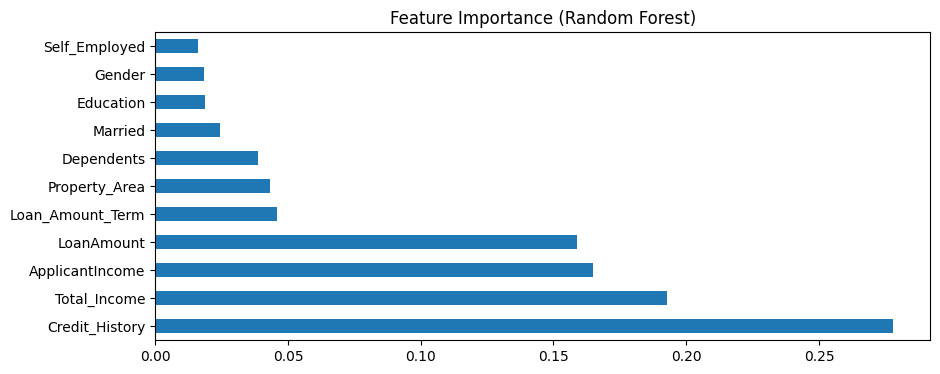

In [1266]:
importances = rf_model.feature_importances_
feature_names = x.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
feat_imp.plot(kind='barh', figsize=(10,4))
plt.title("Feature Importance (Random Forest)")
plt.show()
